In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import decomposition, ensemble
import xgboost

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score



from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
dataset = pd.read_csv("IMDB Dataset.csv")
print(dataset.shape)
dataset.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [3]:
dataset["review"][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

<function matplotlib.pyplot.show(close=None, block=None)>

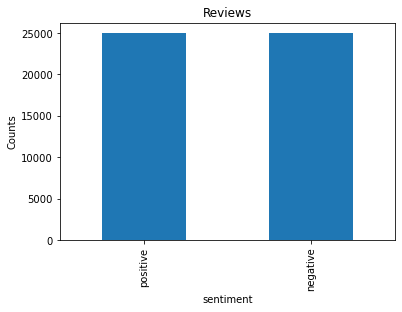

In [4]:

plt.title('Reviews')
plt.xlabel('sentiment')
plt.ylabel('Counts')

dataset["sentiment"].value_counts().plot(kind = 'bar')
plt.show


In [5]:

df = dataset.copy()
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
o_df = dataset.copy()
o_df["word_count"] =dataset["review"].apply(lambda x: len(str(x).split(" ")))
o_df["number_count"] = dataset["review"].apply(lambda x: len([x for x in x.split() 
                                       if x.isdigit()]))

o_df.head(3)

,review,sentiment,word_count,number_count
0,One of the other reviewers has mentioned that ...,positive,307,1
1,A wonderful little production. <br /><br />The...,positive,162,0
2,I thought this was a wonderful way to spend ti...,positive,166,0


In [7]:
print(" max: ",o_df["number_count"].max())


 max:  33


In [8]:
## büyük - küçük dönüşümü
df['review'] = df['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# noktalama
df["review"] = df["review"].str.replace('[^\w\s]','')
# sayılar
df["review"] = df["review"].str.replace('\d', '')
#stopwords
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
df['review'] =df['review'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
# seyreklerin silinmesi
delete = pd.Series(' '.join(df['review']).split()).value_counts()[-1000:]


In [9]:
dataset["review"][5]

'Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it\'s not preachy or boring. It just never gets old, despite my having seen it some 15 or more times in the last 25 years. Paul Lukas\' performance brings tears to my eyes, and Bette Davis, in one of her very few truly sympathetic roles, is a delight. The kids are, as grandma says, more like "dressed-up midgets" than children, but that only makes them more fun to watch. And the mother\'s slow awakening to what\'s happening in the world and under her own roof is believable and startling. If I had a dozen thumbs, they\'d all be "up" for this movie.'

In [10]:
df["review"][5]

'probably alltime favorite movie story selflessness sacrifice dedication noble cause preachy boring never gets old despite seen times last years paul lukas performance brings tears eyes bette davis one truly sympathetic roles delight kids grandma says like dressedup midgets children makes fun watch mothers slow awakening whats happening world roof believable startling dozen thumbs theyd movie'

### Tokenization

In [11]:
from nltk.tokenize import WordPunctTokenizer
tokenizator = WordPunctTokenizer() # split data by dividing characters
df["Token_review"] = [tokenizator.tokenize(x.lower()) for x in df['review']]

### Normalization

In [12]:
from gensim.models import Word2Vec
model = Word2Vec(df["Token_review"], vector_size=32, min_count=6, window=5).wv
df['review'] = [" ".join(token) for token in df['Token_review']]


In [13]:
model.most_similar("director") 

[('filmmaker', 0.8261909484863281),
 ('screenwriter', 0.7699681520462036),
 ('writerdirector', 0.7632554769515991),
 ('carpenter', 0.755451500415802),
 ('directors', 0.7434194087982178),
 ('writer', 0.7410480380058289),
 ('firsttime', 0.7198154330253601),
 ('producer', 0.702863872051239),
 ('editor', 0.6650515198707581),
 ('directorial', 0.6647442579269409)]

### stemming

In [14]:

from nltk.stem import PorterStemmer
st = PorterStemmer()

In [15]:
df["review"] = df["review"].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


In [16]:
df['review'][5]

'probabl alltim favorit movi stori selfless sacrific dedic nobl caus preachi bore never get old despit seen time last year paul luka perform bring tear eye bett davi one truli sympathet role delight kid grandma say like dressedup midget children make fun watch mother slow awaken what happen world roof believ startl dozen thumb theyd movi'

### Label Encoding

In [17]:
encoder = preprocessing.LabelEncoder()
df["sentiment"] = encoder.fit_transform(df['sentiment'])
df

,review,sentiment,Token_review
0,one review mention watch oz episod youll hook ...,1,"[one, reviewers, mentioned, watching, oz, epis..."
1,wonder littl product br br film techniqu unass...,1,"[wonderful, little, production, br, br, filmin..."
2,thought wonder way spend time hot summer weeke...,1,"[thought, wonderful, way, spend, time, hot, su..."
3,basic there famili littl boy jake think there ...,0,"[basically, theres, family, little, boy, jake,..."
4,petter mattei love time money visual stun film...,1,"[petter, matteis, love, time, money, visually,..."
...,...,...,...
49995,thought movi right good job wasnt creativ orig...,1,"[thought, movie, right, good, job, wasnt, crea..."
49996,bad plot bad dialogu bad act idiot direct anno...,0,"[bad, plot, bad, dialogue, bad, acting, idioti..."
49997,cathol taught parochi elementari school nun ta...,0,"[catholic, taught, parochial, elementary, scho..."
49998,im go disagre previou comment side maltin one ...,0,"[im, going, disagree, previous, comment, side,..."


In [18]:
df.isna().sum()

review          0
sentiment       0
Token_review    0
dtype: int64

In [19]:
df.dtypes

review          object
sentiment        int32
Token_review    object
dtype: object

### Train-test-split

In [20]:

x = df["review"]
y = df["sentiment"]
X_train,X_test, Y_train,Y_test= train_test_split(x,y, test_size = 0.25, random_state =42)

In [30]:
df.isnull().sum()

review          0
sentiment       0
Token_review    0
dtype: int64

In [22]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(37500,) (37500,)
(12500,) (12500,)


### TF-IDF

In [23]:

tf_idf_word_vectorizer = TfidfVectorizer()
tf_idf_word_vectorizer.fit(X_train)


TfidfVectorizer()

In [24]:
X_train_tf_idf_word = tf_idf_word_vectorizer.transform(X_train)
X_test_tf_idf_word = tf_idf_word_vectorizer.transform(X_test)


In [25]:
def metrics():
    print("Accuracy score: ",accuracy_score(Y_test,y_pred))
    print("Precision score: ", precision_score(Y_test, y_pred))
    print("Recall score: ", recall_score(Y_test,y_pred))
    print("F-measure: ",f1_score(Y_test,y_pred))


### Lojistik Regresyon

In [26]:
loj = linear_model.LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
loj_model = loj.fit(X_train_tf_idf_word,Y_train)
cross_accuracy = model_selection.cross_val_score(loj_model, 
                                           X_test_tf_idf_word, 
                                           Y_test, 
                                           cv = 10).mean()
y_pred =loj_model.predict(X_test_tf_idf_word)

metrics()

print("Word-Level TF-IDF Doğruluk Oranı:", cross_accuracy)

Accuracy score:  0.89008
Precision score:  0.8840624516926882
Recall score:  0.9016238373009617
F-measure:  0.8927567905088979
Word-Level TF-IDF Doğruluk Oranı: 0.87752


### Naive Bayes

In [27]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(X_train_tf_idf_word,Y_train)
cross_accuracy = model_selection.cross_val_score(nb_model, 
                                           X_test_tf_idf_word, 
                                           Y_test, 
                                           cv = 10).mean()
y_pred =nb_model.predict(X_test_tf_idf_word)

metrics()

print("Word-Level TF-IDF Doğruluk Oranı:", cross_accuracy)

Accuracy score:  0.8608
Precision score:  0.8788477366255144
Recall score:  0.8417152766829575
F-measure:  0.8598808181671765
Word-Level TF-IDF Doğruluk Oranı: 0.8540000000000001


### Random Forest

In [28]:
rf = ensemble.RandomForestClassifier(random_state = 42,max_depth = 3)
rf_model = rf.fit(X_train_tf_idf_word,Y_train)
cross_accuracy = model_selection.cross_val_score(rf_model, 
                                           X_test_tf_idf_word, 
                                           Y_test, 
                                           cv = 10).mean()
y_pred =rf_model.predict(X_test_tf_idf_word)

metrics()

print("Word-Level TF-IDF Doğruluk Oranı:", cross_accuracy)

Accuracy score:  0.7876
Precision score:  0.7989623865110247
Recall score:  0.7769194387513795
F-measure:  0.7877867476620575
Word-Level TF-IDF Doğruluk Oranı: 0.73168


### XGBoost

In [29]:
xgb = xgboost.XGBClassifier()
xgb_model = xgb.fit(X_train_tf_idf_word,Y_train)
cross_accuracy = model_selection.cross_val_score(xgb_model, 
                                           X_test_tf_idf_word, 
                                           Y_test, 
                                           cv = 10).mean()
y_pred =xgb_model.predict(X_test_tf_idf_word)

metrics()


print("Word-Level TF-IDF Doğruluk Oranı:", cross_accuracy)

Accuracy score:  0.85592
Precision score:  0.8497074222359101
Recall score:  0.8699353618161753
F-measure:  0.8597024226844279
Word-Level TF-IDF Doğruluk Oranı: 0.8384
